<a href="https://colab.research.google.com/github/RaisaSyeeda/ml-project02-heart-disease-prediction/blob/main/Project_02_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [2]:
#dataset
disease_df = pd.read_csv('https://raw.githubusercontent.com/RaisaSyeeda/ml-project02-heart-disease-prediction/refs/heads/main/framingham.csv')
disease_df.drop(['education'], inplace = True, axis=1)
disease_df.rename(columns={'male': 'Sex_male'},inplace = True)

In [3]:
#removing null values
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

In [4]:
#splitting dataset into test and train
x = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']])
y = np.asarray(disease_df['TenYearCHD'])

#normalization
x = preprocessing.StandardScaler().fit(x).transform(x)

#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (2625, 6) (2625,)
Test set: (1126, 6) (1126,)


<ipython-input-5-aad1eeebb6de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette='BuGn_r')


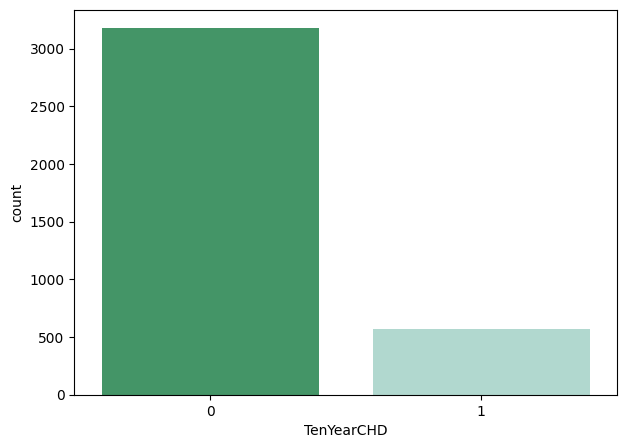

In [5]:
#EDA

#no of patients affected w CHD (0=not affected, 1=affected)
plt.figure(figsize=(7,5))
sns.countplot(x='TenYearCHD', data=disease_df, palette='BuGn_r')
plt.show()

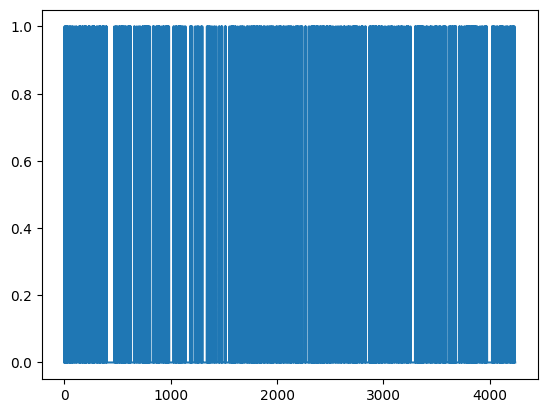

In [6]:
disease_df['TenYearCHD'].plot()
plt.show()

In [7]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

In [8]:
#evaluation and accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression:', accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression: 0.8490230905861457


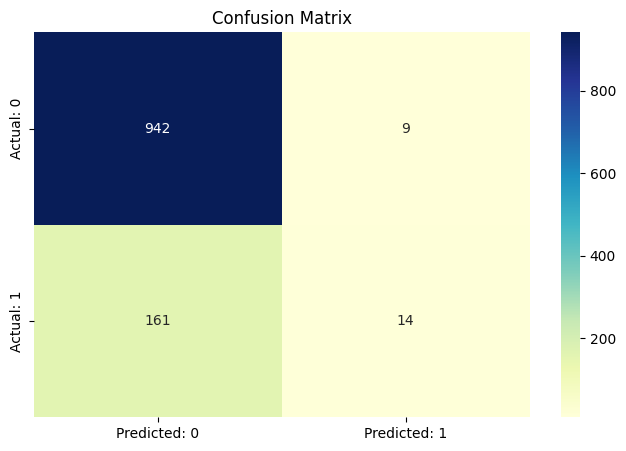

Details of Confusion Matrix:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
c_m = pd.DataFrame(data = cm, columns = ['Predicted: 0', 'Predicted: 1'], index = ['Actual: 0', 'Actual: 1'])

plt.figure(figsize = (8,5))
sns.heatmap(c_m, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.title('Confusion Matrix')
plt.show()
print('Details of Confusion Matrix:')
print(classification_report(y_test, y_pred))